In [2]:
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import keras
import numpy as np
from keras import layers, optimizers, callbacks, preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [3]:
EPOCH = 200

train_data = preprocessing.image_dataset_from_directory(
    '/Users/rudisargueta/Documents/Alzheimer_CNN/AlzheimersDataset/train',   
    validation_split=.2, 
    labels='inferred', 
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32, 
    seed=1337,
    image_size=(128, 128),
    shuffle=True,
    subset='training',
)

val_data = preprocessing.image_dataset_from_directory(
    '/Users/rudisargueta/Documents/Alzheimer_CNN/AlzheimersDataset/train',   
    validation_split=.2, 
    labels='inferred', 
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32, 
    seed=1337,
    image_size=(128, 128),
    shuffle= True,
    subset='validation',
)


test_data = preprocessing.image_dataset_from_directory(
    '/Users/rudisargueta/Documents/Alzheimer_CNN/AlzheimersDataset/test',    
    labels='inferred', 
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32, 
    seed=1337,
    image_size=(128, 128),
)

class_names = ['MildDementia', 'NonDementia', 'VeryMildDementia']
train_data.class_names = class_names
val_data.class_names = class_names


Found 5121 files belonging to 3 classes.
Using 4097 files for training.
Found 5121 files belonging to 3 classes.
Using 1024 files for validation.
Found 1279 files belonging to 3 classes.


2024-04-28 09:58:37.414893: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-04-28 09:58:37.414920: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-04-28 09:58:37.414927: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-04-28 09:58:37.414954: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-28 09:58:37.414969: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model = keras.models.Sequential()
model.add(layers.Input(shape=(128,128,3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 343,811 (1.31 MB)

 Trainable params: 343,811 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
optimizer = optimizers.Adam(learning_rate=1e-4)

model.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', 'auc', 'f1_score']
)

history = model.fit(train_data, validation_data = val_data, epochs= EPOCH)

Epoch 1/200


2024-04-28 08:12:09.540015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-28 08:12:09.826713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4377 - auc: 0.6038 - f1_score: 0.3562 - loss: 3.2884

2024-04-28 08:12:16.996647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


129/129 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.4380 - auc: 0.6040 - f1_score: 0.3563 - loss: 3.2765 - val_accuracy: 0.5430 - val_auc: 0.7436 - val_f1_score: 0.3681 - val_loss: 0.9243
Epoch 2/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.5499 - auc: 0.7416 - f1_score: 0.4323 - loss: 0.9340 - val_accuracy: 0.5576 - val_auc: 0.7666 - val_f1_score: 0.3922 - val_loss: 0.8779
Epoch 3/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.5398 - auc: 0.7496 - f1_score: 0.4413 - loss: 0.9174 - val_accuracy: 0.5508 - val_auc: 0.7703 - val_f1_score: 0.4085 - val_loss: 0.8650
Epoch 4/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.5602 - auc: 0.7660 - f1_score: 0.4721 - loss: 0.8832 - val_accuracy: 0.5654 - val_auc: 0.7702 - val_f1_score: 0.3910 - val_loss: 0.8912
Epoch 5/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.5908 - auc: 0.7877 - f1_score: 0.5066 - loss: 0.8489 - val_accuracy: 0.5791 - val_auc: 0.7940 - val_f1_score: 0.4906 - val_loss:

In [56]:
evaluate = model.evaluate(test_data)
print(evaluate)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6486 - auc: 0.8078 - f1_score: 0.5630 - loss: 1.7904
[1.7402565479278564, 0.6622361540794373, 0.8146151304244995, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.35199997, 0.7498277 , 0.604434  ], dtype=float32)>]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


2024-04-28 08:35:49.146826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

2024-04-28 08:35:50.469816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


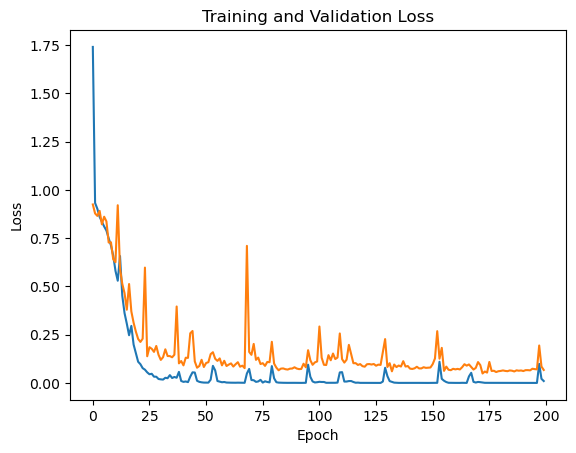

[[ 44   4  11]
 [ 89 544 178]
 [ 58  92 259]]


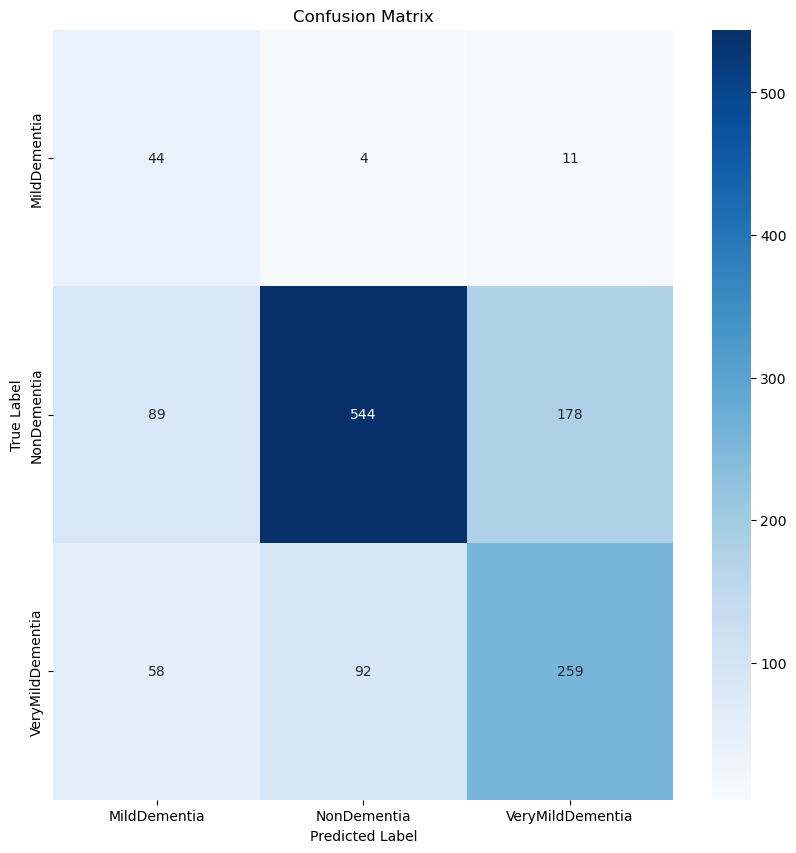

In [57]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_data:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

confusion = confusion_matrix(predictions, labels)


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Valadation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()




print(confusion)
plt.figure(figsize=(10,10))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()